In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression


Load data


In [2]:
df=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Big data\CCBST_Project\CCBST_Project_123\Dataset\Algerian_forest_fires_cleaned.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


Basic Information about Data

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [6]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          8
Region           2
dtype: int64

Data Cleaning

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Remove extra space fron column Classes

In [12]:
df['Classes'] = df['Classes'].apply(lambda x: x.strip())

In [13]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [14]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [15]:
df['Region'].value_counts()

Region
0    122
1    121
Name: count, dtype: int64

Feature Engineering

In [16]:
df['month'].unique()

array([6, 7, 8, 9])

In [17]:
df['month'].astype(str)

0      6
1      6
2      6
3      6
4      6
      ..
238    9
239    9
240    9
241    9
242    9
Name: month, Length: 243, dtype: object

In [18]:
df['month'] = df['month'].replace({6: 'June', 7: 'July', 8: 'August', 9: 'September'})

In [19]:
df['month'].unique()

array(['June', 'July', 'August', 'September'], dtype=object)

In [20]:
df.drop(df[['day', 'year']], axis = 1, inplace=True)

In [21]:
df.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,June,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,June,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,June,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,June,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,June,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### **Columns Descriptions**
**DC -** The Drought Code is a component of the Canadian Forest Fire Weather Index (FWI) System. It is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

**DMC -** The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

In [22]:
# Rename specific columns
df.rename(columns={
    'month': 'Months',
    'RH': 'Relative_Humidity',
    'Ws': 'Wind_speed',
    'FFMC': 'Fine_Fuel_Moisture_Code',
    'DMC': 'Duff_Moisture_Code',
    'DC': 'Drought_Code',
    'ISI': 'Initial_Spread_IDX',
    'BUI': 'Buildup_IDX',
    'FWI': 'Fire_Weather_IDX',
    # add other column renames as needed
}, inplace=True)

In [23]:
df.head()

,Months,Temperature,Relative_Humidity,Wind_speed,Rain,Fine_Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_IDX,Buildup_IDX,Fire_Weather_IDX,Classes,Region
0,June,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,June,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,June,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,June,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,June,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# **Visualizations**


1.   Histogram of Features
2.   PieChart of Categorical column 'Classes'
3.   FWI System Components Report
2.   Fire Danger Indices (FFMC, DMC, DC)





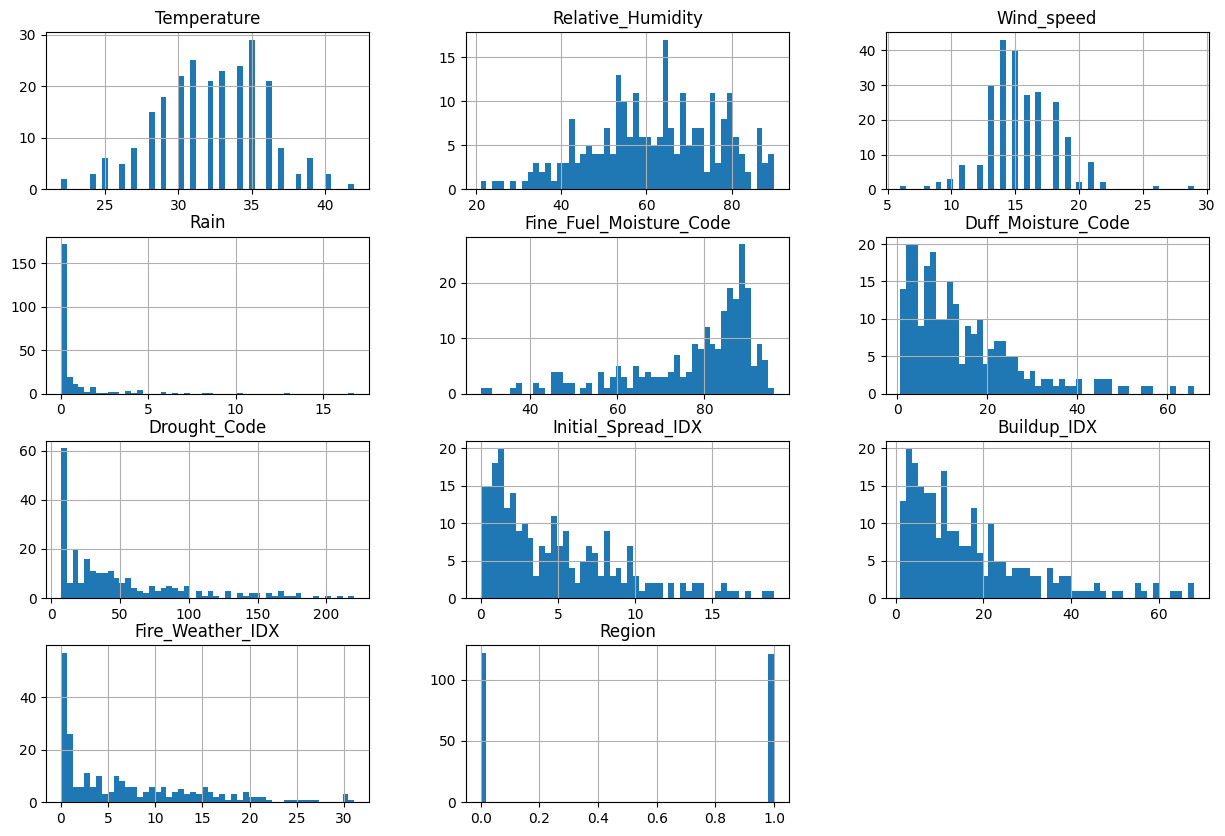

In [24]:
# Histogram of different features

df.hist(bins = 50, figsize=(15,10))
plt.show()

## ***Observation:***
We can see the respected distribution and its impact on the count of fire.

***2.   PieChart of Categorical column*** **'Classes'**

In [25]:
# Analysis of Class column using PieChart

class_percent = df['Classes'].value_counts(normalize=True)
class_percent

Classes
fire        0.563786
not fire    0.436214
Name: proportion, dtype: float64

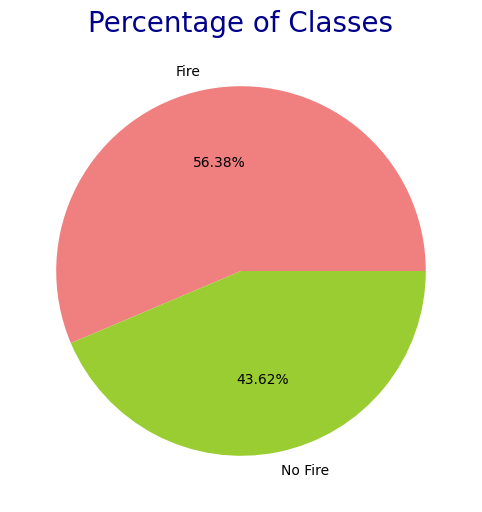

In [26]:
classes_labels = ["Fire", "No Fire"]
plt.figure(figsize =(8,6))

colors = ['lightcoral', 'yellowgreen']

plt.pie(class_percent,labels = classes_labels, colors=colors, autopct='%1.2f%%')
plt.title ("Percentage of Classes", fontsize = 20, color='darkblue')
plt.show()

## ***Observation:***
We can see the percentage of fire is 56.4% in the whole data set (both region )

***3.   Forest Fire Weather Index (FWI) Components Report***

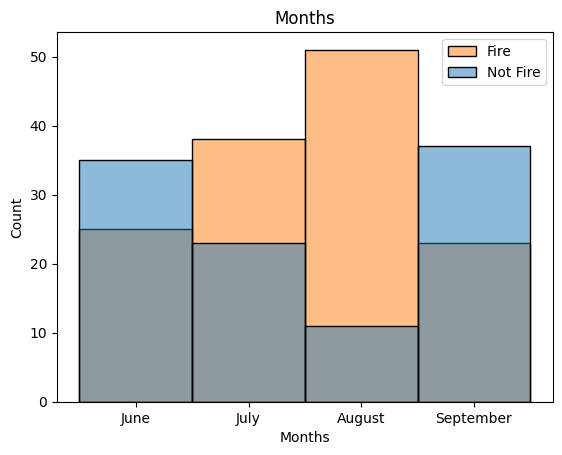

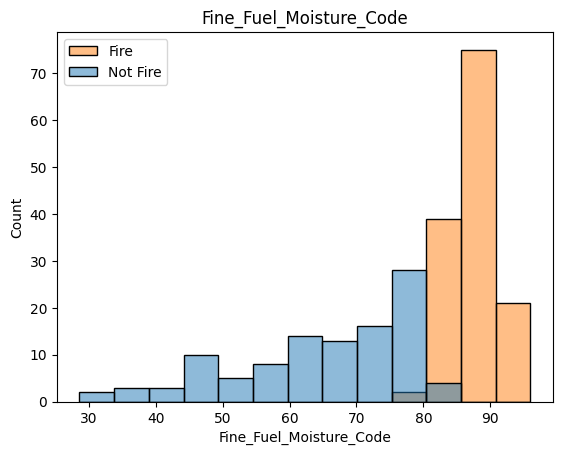

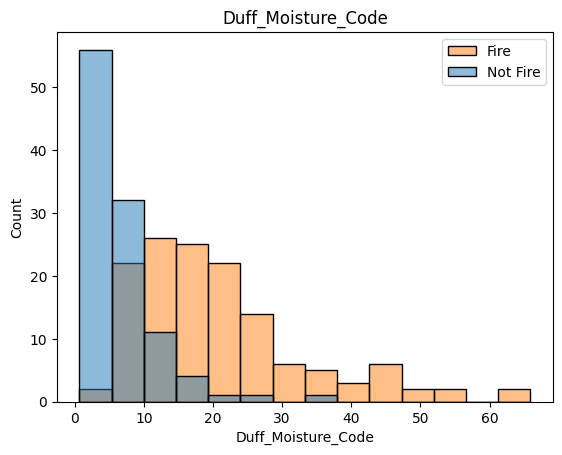

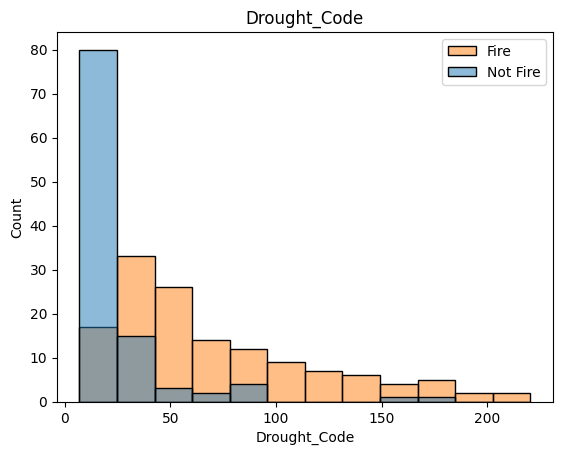

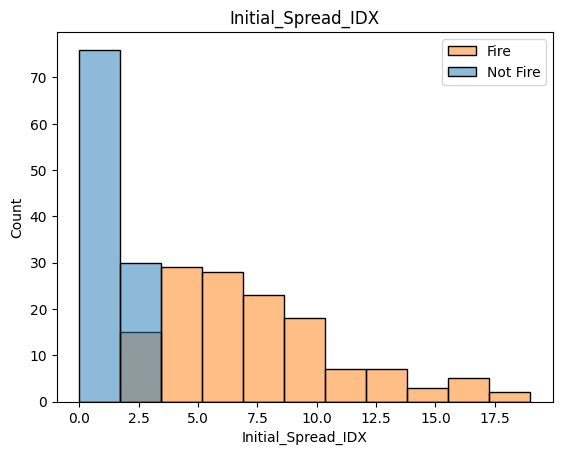

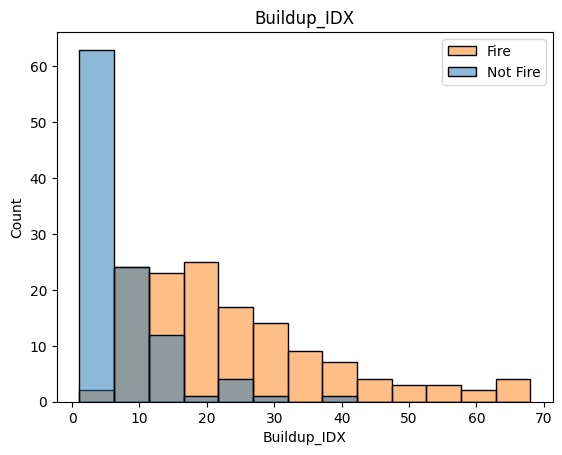

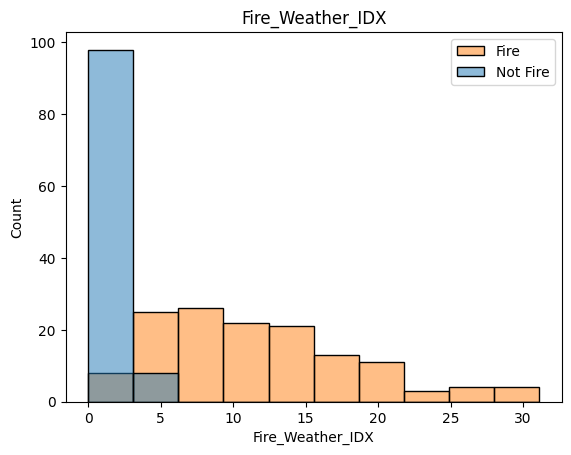

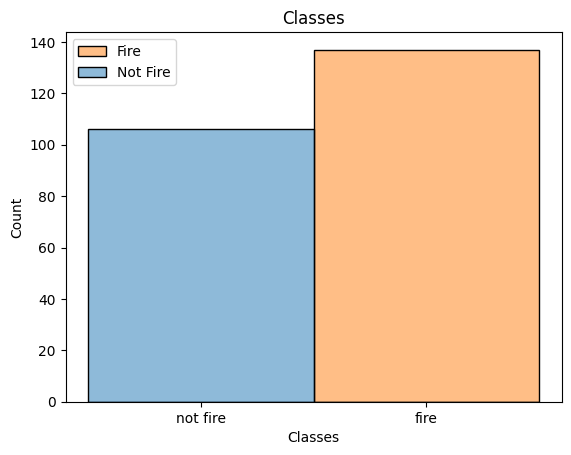

In [27]:
# Use Fine_Fuel_Moisture_Code (FFMC), Duff_Moisture_Code (DMC), Drought_Code (DC), Buildup_IDX (BUI), Initial_Spread_IDX (ISI) columns

df_FWI = df.drop(['Temperature', 'Relative_Humidity', 'Wind_speed', 'Rain', 'Region'], axis=1)
for feature in df_FWI:
    sns.histplot(data = df_FWI, x = feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

***Observations:***

1.   Fine Fuel Moisture Code (FFMC) index which ranges between 28.6 to 96,
here above 75 has higher chance of Forest fires.

2.   Duff Moisture Code (DMC) index which ranges between 0.7 to 65.9,
here 1.1-10 has lower chance of Forest fires whereas above 10-30 DMC has very high evidence of Forest fires in past.

3. Drought Code (DC) index which ranges between 6.9 to 220.4,
here 0-25 is safe and has lower chance of Forest fires whereas range above 25 DC has higher chance of forest fires.

4. Initial Spread Index (ISI) index which ranges between 0 to 19,
here 0-3 has lower Forest fires and above 3 ISI has higher chance of Forest fires.

5. Buildup Index (BUI) index which ranges between 1.1 to 68,
here 1.1 to 10 has lower Forest fire chance and above 10 BUI has higher chance of forest fires.

6. Fire Weather Index (FWI) Index which ranges between 0 to 31.1,
here 0-3 has lower chance of Forest fires and 3-25 FWI has higher chance of forest fires.

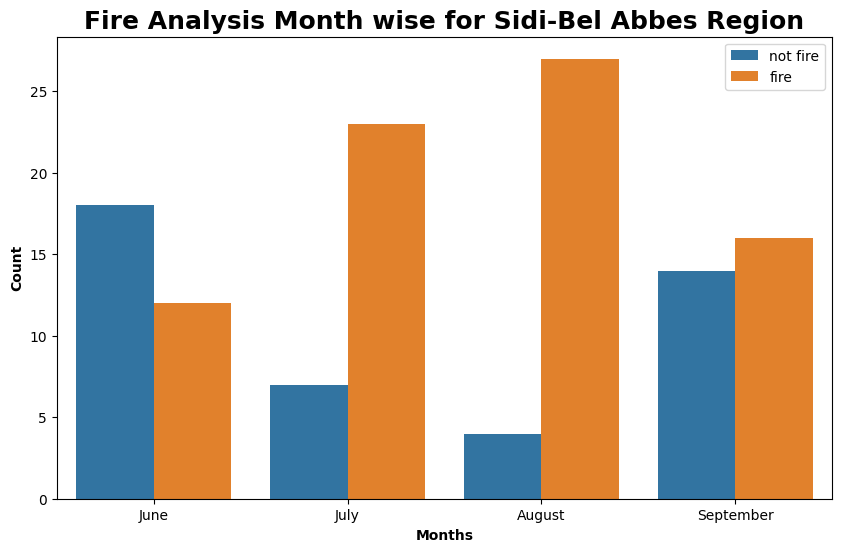

In [28]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(10,6))
sns.countplot(x='Months', hue='Classes', data= dftemp)
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.show()

***Observation:***

1. Its observed that July and August had the most number of forest fires for Sidi-Bel Abbes Region.

2. Most of the fires happened in August.

3. Less Fires was on June

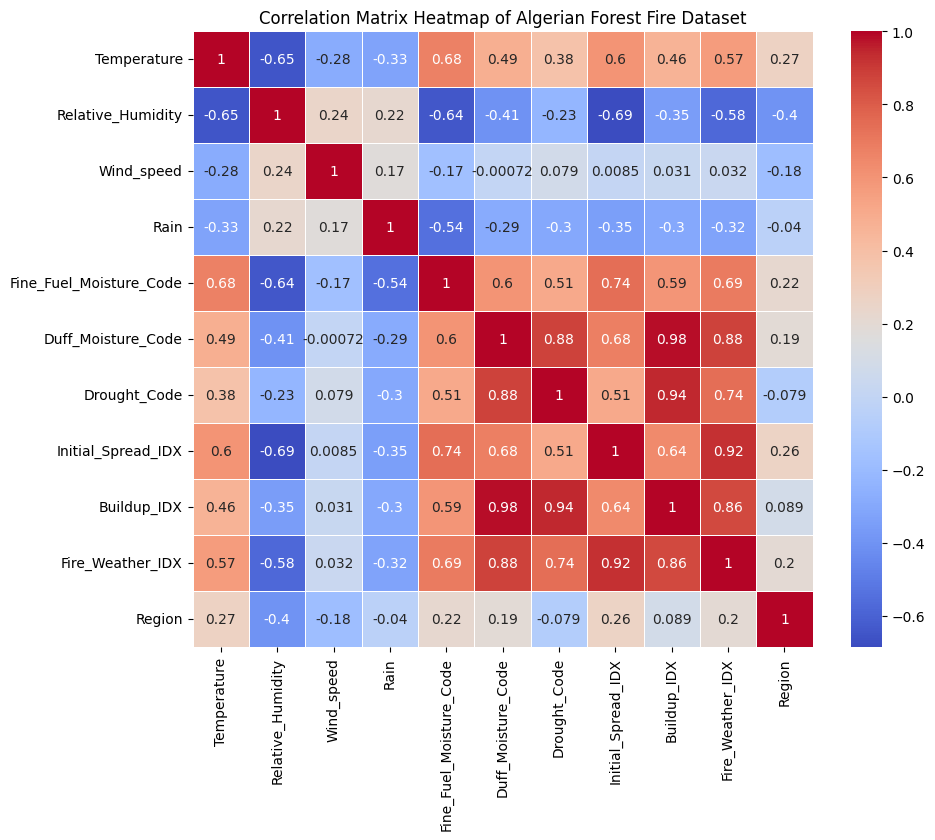

In [29]:
df_corr = df.drop(['Months', 'Classes'], axis=1, inplace=False)
correlation = df_corr.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Algerian Forest Fire Dataset')
plt.show()

***Observation:***

1. We can see that there few features like BUI and DMC which is highly correlated.

# **Model Development and Analysis**

1. Regression
*   Linear Regression
*   Polynomial Regression

2. Regulaization Techniques
*   Lasso
*   Ridge
*   ElasticNet

3. Cross-validation and Yyperparameter tuning

In [30]:
encoder = LabelEncoder()
df['Classes'] = encoder.fit_transform(df['Classes'])

In [31]:
X = df.drop('Fire_Weather_IDX', axis=1)
y = df['Fire_Weather_IDX']

In [32]:
num_col = X.drop(['Classes', 'Region', 'Months'], axis=1)
cat_col = X[['Classes', 'Region']]

In [33]:
sc = StandardScaler()
df_sc = sc.fit_transform(num_col)
df_sc_1 = pd.DataFrame(df_sc, columns = num_col.columns)

In [34]:
final_df = pd.concat([df_sc_1, cat_col], axis = 1)
final_df

,Temperature,Relative_Humidity,Wind_speed,Rain,Fine_Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_IDX,Buildup_IDX,Classes,Region
0,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.879401,-0.830356,-0.936012,1,0
1,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.879401,-0.902720,-0.900798,1,0
2,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.889913,-1.071571,-0.985310,1,0
3,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.894117,-1.143935,-1.055737,1,0
4,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.740651,-0.854477,-0.900798,1,0
...,...,...,...,...,...,...,...,...,...,...,...
238,-0.594455,0.199954,-0.532446,-0.381657,0.527763,0.106678,-0.103661,-0.058467,0.014752,0,1
239,-1.146855,1.686680,-0.176015,1.819355,-2.565794,-0.661463,-0.870992,-1.119814,-0.738816,1,1
240,-1.423054,1.686680,4.814014,-0.131542,-2.230600,-0.904034,-0.873095,-1.047449,-0.936012,1,1
241,-2.251654,-0.543409,0.893277,-0.331634,0.129721,-0.839349,-0.719628,-0.733870,-0.816286,1,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size = 0.25, random_state=42)

Linear Regression


In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [39]:
lr.coef_, lr.intercept_

(array([-5.96272978e-02, -1.73954788e-01, -7.38472341e-02,  5.49038946e-04,
        -8.83619752e-01,  3.12706046e-03, -6.37905657e-01,  4.83736142e+00,
         4.17259508e+00, -6.05387397e-01, -3.38230411e-01]),
 7.460256014235744)

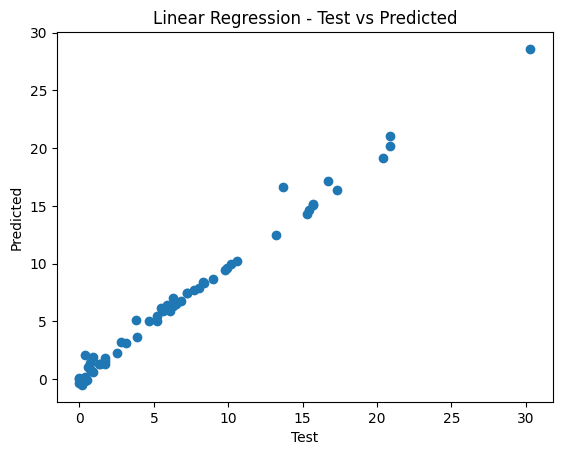

In [40]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.title('Linear Regression - Test vs Predicted')
plt.show()

In [41]:
# Evaluate the Model using Metrics on Test data
print("Metrics on Test Data:\n")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_test))

# Evaluate the Model using Metrics on Train data
print("\nMetrics on Train Data:\n")
print('R2 Score_train: ', r2_score(y_train, y_pred_train))
print('Mean Squared Error_train: ', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Mean Absolute Error_train: ', mean_absolute_error(y_train, y_pred_train))

Metrics on Test Data:

R2 Score:  0.9893850294922101
Mean Squared Error:  0.46982435716885146
Root Mean Squared Error:  0.6854373473694378
Mean Absolute Error:  0.46544608000940896

Metrics on Train Data:

R2 Score_train:  0.9723553091099947
Mean Squared Error_train:  1.6233157448943187
Root Mean Squared Error_train:  1.2740940879284852
Mean Absolute Error_train:  0.6794848402223804


## ***Regularization on Linear Regression***
1. Ridge Regression
2. Lassor Regression
3. EN

In [42]:
%%time
rd = Ridge()
rd.fit(X_train, y_train)
y_pred_test_rd = rd.predict(X_test)
y_pred_train_rd = rd.predict(X_train)

print("Ridge Metrics on Test Data:\n")
print('R2 Score: ', r2_score(y_test, y_pred_test_rd))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_test_rd))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_test_rd)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_test_rd))

# evaluate the models using metrics on train data
print("\nRidge Metrics on Train Data:\n")
print('R2 Score_train: ', r2_score(y_train, y_pred_train_rd))
print('Mean Squared Error_train: ', mean_squared_error(y_train, y_pred_train_rd))
print('Root Mean Squared Error_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train_rd)))
print('Mean Absolute Error_train: ', mean_absolute_error(y_train, y_pred_train_rd))
print("\n Coefficients are as:\n")

for i, col in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col, rd.coef_[i]))

Ridge Metrics on Test Data:

R2 Score:  0.9872379672954208
Mean Squared Error:  0.5648544955632806
Root Mean Squared Error:  0.751568024574809
Mean Absolute Error:  0.5000180378459341

Ridge Metrics on Train Data:

R2 Score_train:  0.9721677807698492
Mean Squared Error_train:  1.6343275412780534
Root Mean Squared Error_train:  1.2784082060429889
Mean Absolute Error_train:  0.6877258248028222

 Coefficients are as:

The coefficient for Temperature is -0.0640223059873574
The coefficient for Relative_Humidity is -0.20713303652325876
The coefficient for Wind_speed is -0.058390800966209126
The coefficient for Rain is 0.015232410945048689
The coefficient for Fine_Fuel_Moisture_Code is -0.8160465073439876
The coefficient for Duff_Moisture_Code is 1.6120603551227701
The coefficient for Drought_Code is 0.2222791723749248
The coefficient for Initial_Spread_IDX is 4.730675822041058
The coefficient for Buildup_IDX is 1.7944744099445837
The coefficient for Classes is -0.6456868914321815
The coeffic

Lasso Modal

In [43]:
%%time
ls=Lasso(alpha=1)
ls.fit(X_train, y_train)
y_pred_test_ls = ls.predict(X_test)
y_pred_train_ls = ls.predict(X_train)

# evaluate the models using metrics on test data
print("Lasso Metrics on Test Data:\n")
print('R2 Score: ', r2_score(y_test, y_pred_test_ls))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_test_ls))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_test_ls)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_test_ls))

# evaluate the models using metrics on train data
print("\nLasso Metrics on Train Data:\n")
print('R2 Score_train: ', r2_score(y_train, y_pred_train_ls))
print('Mean Squared Error_train: ', mean_squared_error(y_train, y_pred_train_ls))
print('Root Mean Squared Error_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train_ls)))
print('Mean Absolute Error_train: ', mean_absolute_error(y_train, y_pred_train_ls))
print("\n Coefficients are as:\n")

for i, col in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col, ls.coef_[i]))

Lasso Metrics on Test Data:

R2 Score:  0.9566258940916221
Mean Squared Error:  1.9197614737810575
Root Mean Squared Error:  1.3855545726462952
Mean Absolute Error:  1.0555406999047656

Lasso Metrics on Train Data:

R2 Score_train:  0.9485131409150515
Mean Squared Error_train:  3.0233446754859346
Root Mean Squared Error_train:  1.7387767756345076
Mean Absolute Error_train:  1.2195875396540454

 Coefficients are as:

The coefficient for Temperature is 0.0
The coefficient for Relative_Humidity is -0.0
The coefficient for Wind_speed is 0.0
The coefficient for Rain is -0.0
The coefficient for Fine_Fuel_Moisture_Code is 0.0
The coefficient for Duff_Moisture_Code is 1.2489700776140653
The coefficient for Drought_Code is 0.0
The coefficient for Initial_Spread_IDX is 3.9868600542264994
The coefficient for Buildup_IDX is 1.6259809132832361
The coefficient for Classes is -0.0
The coefficient for Region is 0.0
CPU times: user 30.3 ms, sys: 0 ns, total: 30.3 ms
Wall time: 69.2 ms


Elasticnet Modal

In [44]:
en=ElasticNet(alpha=1)
en.fit(X_train, y_train)
y_pred_test_en = en.predict(X_test)
y_pred_train_en = en.predict(X_train)

# evaluate the models using metrics on test data
print("ElassticNet Metrics on Test Data:\n")
print('R2 Score: ', r2_score(y_test, y_pred_test_en))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_test_en))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_test_en)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_test_en))

# evaluate the models using metrics on train data
print("\nElassticNet Metrics on Train Data:\n")
print('R2 Score_train: ', r2_score(y_train, y_pred_train_en))
print('Mean Squared Error_train: ', mean_squared_error(y_train, y_pred_train_en))
print('Root Mean Squared Error_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train_en)))
print('Mean Absolute Error_train: ', mean_absolute_error(y_train, y_pred_train_en))
print("\n Coefficients are as:\n")

for i, col in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col, en.coef_[i]))

ElassticNet Metrics on Test Data:

R2 Score:  0.9006217678963336
Mean Squared Error:  4.398534501854483
Root Mean Squared Error:  2.097268342834193
Mean Absolute Error:  1.6876180687045532

ElassticNet Metrics on Train Data:

R2 Score_train:  0.9115419491804475
Mean Squared Error_train:  5.194319127292433
Root Mean Squared Error_train:  2.27910489607048
Mean Absolute Error_train:  1.7229285553874556

 Coefficients are as:

The coefficient for Temperature is 0.1724251307477882
The coefficient for Relative_Humidity is -0.5302403426816824
The coefficient for Wind_speed is 0.0
The coefficient for Rain is -0.0
The coefficient for Fine_Fuel_Moisture_Code is 0.3541008900731501
The coefficient for Duff_Moisture_Code is 1.3975596237304928
The coefficient for Drought_Code is 0.7218377857112913
The coefficient for Initial_Spread_IDX is 2.3753541719886244
The coefficient for Buildup_IDX is 1.2403481782349388
The coefficient for Classes is -0.08242433384778663
The coefficient for Region is 0.0


Cross Validation

In [45]:
X = df.drop(['Fire_Weather_IDX', 'Months'], axis=1)
y = df['Fire_Weather_IDX']

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cvs = cross_val_score(lr, X_train, y_train, cv=kf)

print("Linear Regression Cross Validation Analysis:\n")
print(f"Cross Validation Scores: {cvs}")
print(f'\nCross-Validation Mean Score: {cvs.mean()}')
print(f'\nCross-Validation Standard Deviation: {cvs.std()}')

Linear Regression Cross Validation Analysis:

Cross Validation Scores: [0.97438166 0.98788159 0.90475849 0.98308861 0.98499556]

Cross-Validation Mean Score: 0.9670211812292078

Cross-Validation Standard Deviation: 0.03145541917518735


## ***Hyperparameter Tunning using Ridge Model***

In [46]:
# Define the hyperparameter grid
parameters = {'alpha': [0.01, 0.1, 1, 10, 100],
           'solver':['lbfgs','sag', 'newton-cg'],
             'random_state':[42]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rd, param_grid = parameters, cv=5)

# Perform the grid search
grid_search.fit(X, y)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Hyperparameters Analysis for Linear Regression using Ridge Model:\n')
print(f'Best Hyperparameters: {best_params}\n')
print(f'Best Score: {best_score}')

Hyperparameters Analysis for Linear Regression using Ridge Model:

Best Hyperparameters: {'alpha': 100, 'random_state': 42, 'solver': 'sag'}

Best Score: 0.9568717370886972


Hyperparameter Tunning using Lasso Model

In [47]:
# Define the hyperparameter grid
parameters = {'alpha': [0.01, 0.1, 1, 10, 100],
             'random_state':[42]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ls, param_grid = parameters, cv=5)

# Perform the grid search
grid_search.fit(X, y)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Hyperparameters Analysis for Linear Regression using Lasso Model:\n')
print(f'Best Hyperparameters: {best_params}\n')
print(f'Best Score: {best_score}')

Hyperparameters Analysis for Linear Regression using Lasso Model:

Best Hyperparameters: {'alpha': 0.1, 'random_state': 42}

Best Score: 0.9542873232707454


Polinomial Regression

In [48]:
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train= poly_reg.fit_transform(X_train)
X_poly_train

array([[-0.87065469,  0.80816032,  1.24970758, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31825498,  0.67300343, -0.53244583, ...,  1.        ,
         1.        ,  1.        ],
       [ 2.16754373, -2.09771276, -0.17601515, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.97545412,  0.94331721,  0.53684621, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.51034459, -0.20551634,  0.18041553, ...,  0.        ,
         0.        ,  1.        ],
       [-0.59445484,  1.01089565,  1.96256895, ...,  1.        ,
         0.        ,  0.        ]])

In [49]:
X_poly_test = poly_reg.transform(X_test)
X_poly_test

array([[-0.31825498,  0.13237588, -0.17601515, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23414473, -0.54340856, -0.88887652, ...,  0.        ,
         0.        ,  0.        ],
       [-1.14685455, -0.27309478,  0.8932769 , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-0.31825498,  0.67300343, -0.53244583, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.06274431, -1.96255588, -0.88887652, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.51034459, -0.40825167,  0.53684621, ...,  0.        ,
         0.        ,  1.        ]])

In [50]:
reg= LinearRegression()

reg.fit(X_poly_train, y_train)

LinearRegression()

In [51]:
reg.coef_, reg.intercept_

(array([ 1.46128602e-01, -3.40026480e-01,  6.64927653e-01, -3.10006159e-01,
         7.34976154e+00,  2.39842028e+00,  9.00632083e-01, -1.60072666e-01,
        -1.05959284e-01,  1.40435444e+00, -1.26087892e-01,  2.89257971e-02,
        -5.62544350e-03,  6.34841304e-03,  3.61278400e-01, -1.70823093e-01,
        -9.79131078e-01, -6.29845100e-01,  1.36332606e-01,  1.58413159e+00,
         1.36988730e-01, -6.67581461e-02,  4.09975877e-03, -4.60193264e-02,
        -6.30925607e-01,  7.54123879e-02,  2.83430781e-02, -1.66598165e-01,
        -3.48659662e-02,  2.18170148e-01,  1.16555879e-01,  5.95547991e-02,
        -3.33848138e-03,  1.48501079e-01, -1.22997853e-02,  2.89758852e-01,
         5.03914775e-03,  1.78821651e-01, -3.05703619e-01, -3.55459497e-01,
        -7.86927249e-02,  9.57158442e-04, -7.39118794e-01,  3.06316903e+00,
         1.65353138e+00,  2.96300775e-01, -3.98898444e+00,  6.71875212e-01,
         2.36625553e-02, -5.09749063e-01,  4.97192452e+00,  2.25958682e+00,
         4.5

In [52]:
y_poly_pred_test = reg.predict(X_poly_test)

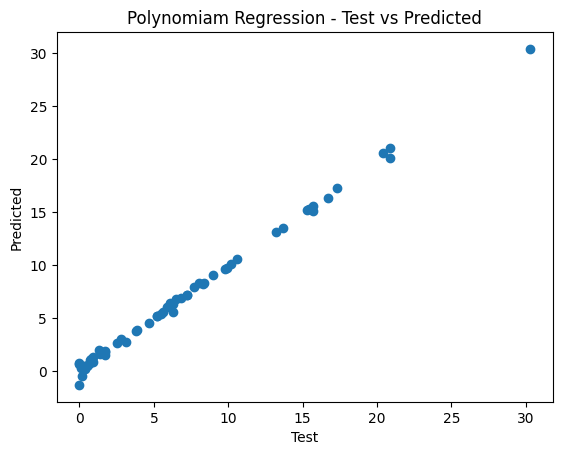

In [53]:
plt.scatter(y_test, y_poly_pred_test)
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.title('Polynomiam Regression - Test vs Predicted')
plt.show()

## ***Regularization on Polynomial Regression***
1. Ridge Regression
2. Lassor Regression
3. EN

Ridge Modal

In [54]:
%%time
rd_poly = Ridge()
rd_poly.fit(X_poly_train, y_train)
y_pred_test_rd_poly = rd_poly.predict(X_poly_test)
y_pred_train_rd_poly = rd_poly.predict(X_poly_train)

print("Ridge Metrics on Test Data:\n")
print('R2 Score: ', r2_score(y_test, y_pred_test_rd_poly))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_test_rd_poly))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_test_rd_poly)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_test_rd_poly))

# evaluate the models using metrics on train data
print("\nRidge Metrics on Train Data:\n")
print('R2 Score_train: ', r2_score(y_train, y_pred_train_rd_poly))
print('Mean Squared Error_train: ', mean_squared_error(y_train, y_pred_train_rd_poly))
print('Root Mean Squared Error_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train_rd_poly)))
print('Mean Absolute Error_train: ', mean_absolute_error(y_train, y_pred_train_rd_poly))
print("\n Coefficients are as:\n")

for i, col in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col, rd_poly.coef_[i]))

Ridge Metrics on Test Data:

R2 Score:  0.9962685647685995
Mean Squared Error:  0.16515534900670484
Root Mean Squared Error:  0.40639309665237283
Mean Absolute Error:  0.26889027376930363

Ridge Metrics on Train Data:

R2 Score_train:  0.9988808586729887
Mean Squared Error_train:  0.0657167679728416
Root Mean Squared Error_train:  0.2563528193190814
Mean Absolute Error_train:  0.17529540304958005

 Coefficients are as:

The coefficient for Temperature is 0.047388401975568005
The coefficient for Relative_Humidity is -0.3046136766263927
The coefficient for Wind_speed is 0.2861896483410995
The coefficient for Rain is -0.6207725590839955
The coefficient for Fine_Fuel_Moisture_Code is 2.1682622224462014
The coefficient for Duff_Moisture_Code is 1.1653591812455555
The coefficient for Drought_Code is 0.4066892017684996
The coefficient for Initial_Spread_IDX is 2.3637708727125877
The coefficient for Buildup_IDX is 1.2998978648230872
The coefficient for Classes is -0.22314670632565406
The coeff

Lasso Modal

In [55]:
%%time
ls_poly = Lasso(alpha=0.05)
ls_poly.fit(X_poly_train, y_train)
y_pred_test_ls_poly = ls_poly.predict(X_poly_test)
y_pred_train_ls_poly = ls_poly.predict(X_poly_train)

print("Lasso Metrics on Test Data:\n")
print('R2 Score: ', r2_score(y_test, y_pred_test_ls_poly))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_test_ls_poly))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_test_ls_poly)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_test_ls_poly))

# evaluate the models using metrics on train data
print("\nLasso Metrics on Train Data:\n")
print('R2 Score_train: ', r2_score(y_train, y_pred_train_ls_poly))
print('Mean Squared Error_train: ', mean_squared_error(y_train, y_pred_train_ls_poly))
print('Root Mean Squared Error_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train_ls_poly)))
print('Mean Absolute Error_train: ', mean_absolute_error(y_train, y_pred_train_ls_poly))
print("\n Coefficients are as:\n")

for i, col in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col, ls_poly.coef_[i]))

Lasso Metrics on Test Data:

R2 Score:  0.9956661868778642
Mean Squared Error:  0.19181692146041351
Root Mean Squared Error:  0.4379690873342701
Mean Absolute Error:  0.28629611431142576

Lasso Metrics on Train Data:

R2 Score_train:  0.9939905003284288
Mean Squared Error_train:  0.3528820587871228
Root Mean Squared Error_train:  0.5940387687576651
Mean Absolute Error_train:  0.30638771264113573

 Coefficients are as:

The coefficient for Temperature is 0.07417583354462146
The coefficient for Relative_Humidity is -0.0038479727501151513
The coefficient for Wind_speed is 0.0
The coefficient for Rain is 0.0
The coefficient for Fine_Fuel_Moisture_Code is 0.5286213941448977
The coefficient for Duff_Moisture_Code is 0.0
The coefficient for Drought_Code is 0.0
The coefficient for Initial_Spread_IDX is 4.79495522974155
The coefficient for Buildup_IDX is 2.7646642320978754
The coefficient for Classes is -0.0
The coefficient for Region is -0.0
CPU times: user 35.2 ms, sys: 31.2 ms, total: 66.4 m

Elasticnet Modal

In [56]:
%%time
en_poly = Lasso(alpha=0.05)
en_poly.fit(X_poly_train, y_train)
y_pred_test_en_poly = en_poly.predict(X_poly_test)
y_pred_train_en_poly = en_poly.predict(X_poly_train)

print("ElasticNet Metrics on Test Data:\n")
print('R2 Score: ', r2_score(y_test, y_pred_test_en_poly))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_test_en_poly))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_test_en_poly)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_test_en_poly))

# evaluate the models using metrics on train data
print("\nElasticNet Metrics on Train Data:\n")
print('R2 Score_train: ', r2_score(y_train, y_pred_train_en_poly))
print('Mean Squared Error_train: ', mean_squared_error(y_train, y_pred_train_en_poly))
print('Root Mean Squared Error_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train_en_poly)))
print('Mean Absolute Error_train: ', mean_absolute_error(y_train, y_pred_train_en_poly))
print("\n Coefficients are as:\n")

for i, col in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col, en_poly.coef_[i]))

ElasticNet Metrics on Test Data:

R2 Score:  0.9956661868778642
Mean Squared Error:  0.19181692146041351
Root Mean Squared Error:  0.4379690873342701
Mean Absolute Error:  0.28629611431142576

ElasticNet Metrics on Train Data:

R2 Score_train:  0.9939905003284288
Mean Squared Error_train:  0.3528820587871228
Root Mean Squared Error_train:  0.5940387687576651
Mean Absolute Error_train:  0.30638771264113573

 Coefficients are as:

The coefficient for Temperature is 0.07417583354462146
The coefficient for Relative_Humidity is -0.0038479727501151513
The coefficient for Wind_speed is 0.0
The coefficient for Rain is 0.0
The coefficient for Fine_Fuel_Moisture_Code is 0.5286213941448977
The coefficient for Duff_Moisture_Code is 0.0
The coefficient for Drought_Code is 0.0
The coefficient for Initial_Spread_IDX is 4.79495522974155
The coefficient for Buildup_IDX is 2.7646642320978754
The coefficient for Classes is -0.0
The coefficient for Region is -0.0
CPU times: user 42.7 ms, sys: 33.7 ms, tot

Crossvalidation Modal

In [57]:
X = df.drop(['Fire_Weather_IDX', 'Months'], axis=1)
y = df['Fire_Weather_IDX']

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cvs_poly = cross_val_score(reg, X_poly_train, y_train, cv=kf)

print("Polynomial Regression Cross Validation Analysis:\n")
print(f"Cross Validation Scores: {cvs_poly}")
print(f'\nCross-Validation Mean Score: {cvs_poly.mean()}')
print(f'\nCross-Validation Standard Deviation: {cvs_poly.std()}')

Polynomial Regression Cross Validation Analysis:

Cross Validation Scores: [0.9981124  0.99860157 0.97626334 0.99769628 0.99697525]

Cross-Validation Mean Score: 0.9935297702668979

Cross-Validation Standard Deviation: 0.00864967498086041


# **Hyperparameter Tunning using Ridge Model**

In [58]:
# Define the hyperparameter grid
parameters = {'alpha': [0.01, 0.1, 1, 10, 100],
           'solver':['lbfgs','sag', 'newton-cg'],
             'random_state':[42]}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rd_poly, param_grid = parameters, cv=5)

# Perform the grid search
grid_search.fit(X, y)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Hyperparameters Analysis for Polynomial Regression using Ridge Model:\n')
print(f'Best Hyperparameters: {best_params}\n')
print(f'Best Score: {best_score}')

Hyperparameters Analysis for Polynomial Regression using Ridge Model:

Best Hyperparameters: {'alpha': 100, 'random_state': 42, 'solver': 'sag'}

Best Score: 0.9568717370886972


## ***Hyperparameter Tunning using Lasso Model***

In [59]:
# Define the hyperparameter grid
parameters_poly = {'alpha': [0.01, 0.1, 1, 5, 10, 100],
             'random_state':[42]}

# Initialize GridSearchCV
grid_search_poly = GridSearchCV(estimator=ls_poly, param_grid = parameters_poly, cv=5)

# Perform the grid search
grid_search_poly.fit(X, y)

# Get the best parameters and the corresponding score
best_params = grid_search_poly.best_params_
best_score = grid_search_poly.best_score_

print(f'Hyperparameters Analysis for Polynomial Regression using Lasso Model:\n')
print(f'Best Hyperparameters: {best_params}\n')
print(f'Best Score: {best_score}')

Hyperparameters Analysis for Polynomial Regression using Lasso Model:

Best Hyperparameters: {'alpha': 0.1, 'random_state': 42}

Best Score: 0.9542873232707454


# **Logistic Regression**

In [60]:
X = df.drop(['Classes'], axis=1)
y = df['Classes']

In [61]:
y = y.map({0: 'not fire', 1: 'fire'})

In [62]:
num_col_log = X.drop(['Region', 'Months'], axis=1)
cat_col_log = X[['Region']]

In [63]:
# Feature scaling of the dataset for Logistic Regression
sc_log = StandardScaler()
df_sc_log = sc_log.fit_transform(num_col_log)
df_sc_log_1 = pd.DataFrame(df_sc_log, columns = num_col_log.columns)


In [64]:
final_df_log = pd.concat([df_sc_log_1, cat_col_log], axis = 1)
final_df_log

,Temperature,Relative_Humidity,Wind_speed,Rain,Fine_Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_IDX,Buildup_IDX,Fire_Weather_IDX,Region
0,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.879401,-0.830356,-0.936012,-0.880159,0
1,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.879401,-0.902720,-0.900798,-0.893626,0
2,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.889913,-1.071571,-0.985310,-0.934029,0
3,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.894117,-1.143935,-1.055737,-0.947497,0
4,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.740651,-0.854477,-0.900798,-0.880159,0
...,...,...,...,...,...,...,...,...,...,...,...
238,-0.594455,0.199954,-0.532446,-0.381657,0.527763,0.106678,-0.103661,-0.058467,0.014752,-0.072104,1
239,-1.146855,1.686680,-0.176015,1.819355,-2.565794,-0.661463,-0.870992,-1.119814,-0.738816,-0.947497,1
240,-1.423054,1.686680,4.814014,-0.131542,-2.230600,-0.904034,-0.873095,-1.047449,-0.936012,-0.920561,1
241,-2.251654,-0.543409,0.893277,-0.331634,0.129721,-0.839349,-0.719628,-0.733870,-0.816286,-0.853223,1


In [65]:
X_train, X_test, y_train, y_test = train_test_split(final_df_log, y, test_size = 0.25, random_state=42)

In [66]:
# Model Building
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [67]:
y_pred_log = log_reg.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred_log)

0.9508196721311475

## **GridSearch for Logistic Regression**

In [69]:
parameter_log = {'C':[0.01,0.1,1,5,100],
           'penalty':['l1','l2', 'elasticnet']}

In [70]:
grid_log = GridSearchCV(log_reg, param_grid = parameter_log, cv=5, verbose=2, n_jobs=-1, scoring='precision')
grid_log.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='precision', verbose=2)

In [71]:
ps = precision_score(y_test,y_pred_log, pos_label='fire')

print('GridSearch for logistic Regression:\n')
print(f'Best Parameters are: {grid_log.best_params_}')
print(f'\nBest Parameters are: {grid_log.best_score_}')
print(f'\n Prescion Score is: {ps}')

GridSearch for logistic Regression:

Best Parameters are: {'C': 0.01, 'penalty': 'l1'}

Best Parameters are: nan

 Prescion Score is: 0.9565217391304348


## **RandomizedSearch for Logistic Regression**

In [72]:
rand = RandomizedSearchCV(log_reg, param_distributions=parameter_log, cv=5, verbose=2, n_jobs=-1, n_iter=10)
rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 5, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   verbose=2)

In [73]:
print('RandomizedSearch for logistic Regression:\n')
print(f'Best Parameters are: {rand.best_params_}')
print(f'\nBest Score is: {rand.best_score_}')

RandomizedSearch for logistic Regression:

Best Parameters are: {'penalty': 'l1', 'C': 1}

Best Score is: 0.978078078078078


## **Using SMOTE to overcome Imbalance**

In [74]:
df['Classes'].value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

In [75]:
sm=SMOTE()

X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [76]:
y_train.value_counts()

Classes
not fire    100
fire         82
Name: count, dtype: int64

In [77]:
y_train_sm.value_counts()

Classes
fire        100
not fire    100
Name: count, dtype: int64

## **GridSearch with SMOTE**

In [78]:
grid_log.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='precision', verbose=2)

In [79]:
print('GridSearch for logistic Regression:\n')
print(f'Best Parameters are: {grid_log.best_params_}')
print(f'\nBest Parameters are: {grid_log.best_score_}')

GridSearch for logistic Regression:

Best Parameters are: {'C': 0.01, 'penalty': 'l1'}

Best Parameters are: nan
